In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# read the data
df = pd.read_csv('sisters67.csv')
df.drop(['sister','year'],axis=1,inplace=True)

In [3]:
# get the questions
questionlist = pd.read_csv('nunquestions.txt',sep='\n')
questionlist = questionlist[
    questionlist['Sisters Survey 1967: Questions and Responses'].apply(lambda s: s.startswith('v'))].reset_index()
questionlist.drop('index',axis=1,inplace=True)
questionlist['v'] = questionlist['Sisters Survey 1967: Questions and Responses'].apply(lambda s: s.split('\t')[0])
questionlist['question'] = questionlist['Sisters Survey 1967: Questions and Responses'].apply(lambda s: s.split('\t')[1])
questionlist.drop('Sisters Survey 1967: Questions and Responses',axis=1,inplace=True)

In [4]:
# aggregate the racism questions and the anti-semitism questions (reordering answers if necessary)
reverse={1:5,2:4,3:3,4:2,5:1}
age = {1:'20 and under',2:'21-30',3:'31-40',4:'41-50',5:'51-60',6:'61-70',7:'71-80',8:'81-90',9:'90 and older'} 

age_racist_antsemite = df[['v181','v117','v120','v123','v126','v138','v141']].dropna()
age_racist_antsemite['age group'] = age_racist_antsemite['v181'].apply(lambda x: age[x])
age_racist_antsemite['level of racist attitide (1-5)'] = (age_racist_antsemite['v117'] + age_racist_antsemite['v120'] 
                                  + age_racist_antsemite['v123'].apply(lambda x: reverse[x]) 
                                  + age_racist_antsemite['v126'])/4
age_racist_antsemite['level of anti-semitic attitude (1-5)'] = (age_racist_antsemite['v138'] 
                                        + age_racist_antsemite['v141'].apply(lambda x: reverse[x]))/2
age_racist_antsemite.head()

,v181,v117,v120,v123,v126,v138,v141,age group,level of racist attitide (1-5),level of anti-semitic attitude (1-5)
0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,51-60,1.00,1.0
1,6.0,2.0,1.0,5.0,4.0,3.0,5.0,61-70,2.00,2.0
2,5.0,1.0,2.0,1.0,1.0,1.0,5.0,51-60,2.25,1.0
3,5.0,1.0,1.0,3.0,1.0,1.0,5.0,51-60,1.50,1.0
4,4.0,3.0,2.0,5.0,5.0,3.0,5.0,41-50,2.75,2.0


In [5]:
# are the racism and anti-semitism colums correlated?
from scipy.stats import pearsonr
pearsonr(x=age_racist_antsemite['level of racist attitide (1-5)'],y=age_racist_antsemite['level of anti-semitic attitude (1-5)'])

(0.26591112774264236, 0.0)

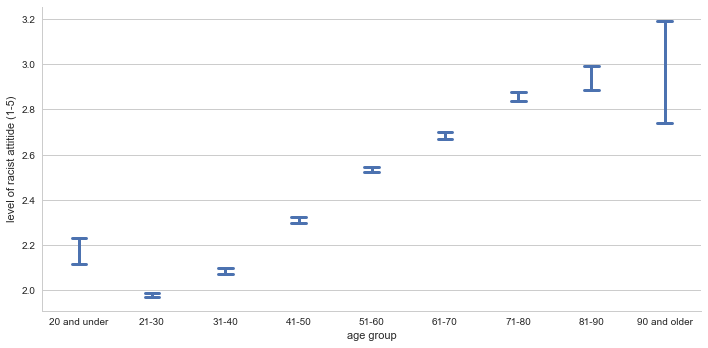

In [8]:
# plot racism vs. age
sns.factorplot(x='age group',y='level of racist attitide (1-5)', kind='point', size=5, aspect=2,
              data=age_racist_antsemite.sort_values('age group'),join=False,scale=0,errwidth=3,capsize=.2)

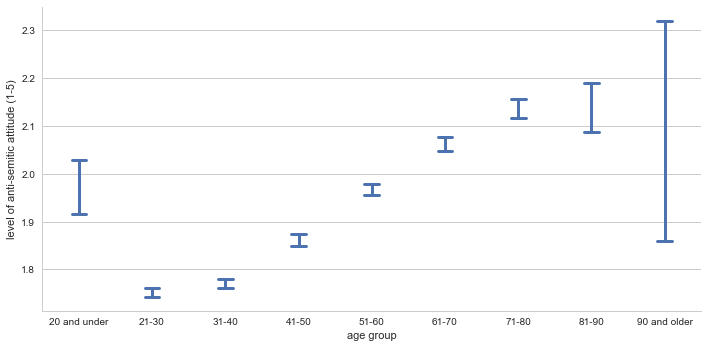

In [9]:
# plot anti-semitism vs. age
sns.factorplot(x='age group',y='level of anti-semitic attitude (1-5)', kind='point', size=5, aspect=2,
              data=age_racist_antsemite.sort_values('age group'),join=False,scale=0,errwidth=3,capsize=.2)

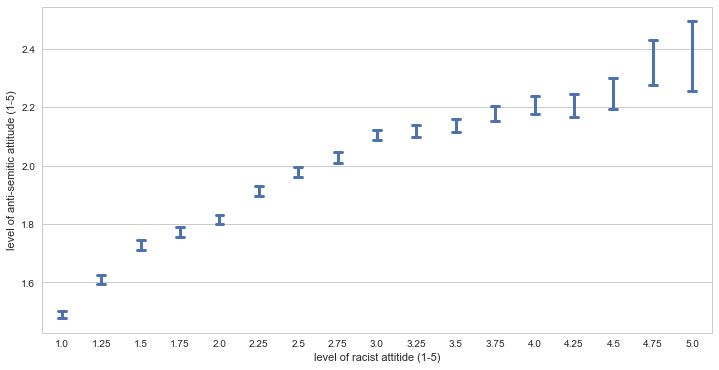

In [7]:
# plot anti-semitism vs. racism
plt.figure(figsize=(12,6))
sns.pointplot(x='level of racist attitide (1-5)',y='level of anti-semitic attitude (1-5)',
              data=age_racist_antsemite,join=False,scale=0,errwidth=3,capsize=.2)